In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos relevantes
cpu_usage = pd.read_csv('fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv')
memory_usage = pd.read_csv('fhir-fastapiapp/Memory Usage-data-2024-08-06 08_30_44.csv')
disk_io_utilization = pd.read_csv('fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv')
network_utilization = pd.read_csv('fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv')
response_time = pd.read_csv('fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv')
pod_counts = pd.read_csv('fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv')
memory_saturation = pd.read_csv('fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv')
cpu_saturation = pd.read_csv('fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv')


request_volume = pd.read_csv('fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv')
request_concurrency = pd.read_csv('fhir-fastapiapp/Request Concurrency-data-2024-08-06 08_24_27.csv')
response_time = pd.read_csv('fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv')
request_count_by_response_code = pd.read_csv('fhir-fastapiapp/Request Count in last minute by Response Code-data-2024-08-06 08_23_41.csv')
observed_concurrency = pd.read_csv('fhir-fastapiapp/Observed Concurrency-data-as-joinbyfield-2024-08-06 08_23_11.csv')
pod_counts = pd.read_csv('fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv')
pod_memory_usage = pd.read_csv('fhir-fastapiapp/Pod Memory Usage-data-2024-08-06 08_19_16.csv')
revision_cpu_usage = pd.read_csv('fhir-fastapiapp/Revision CPU Usage-data-as-joinbyfield-2024-08-06 08_19_02.csv')
request_concurrency = pd.read_csv('fhir-fastapiapp/Request Concurrency-data-2024-08-06 08_18_40.csv')
revision_pod_counts = pd.read_csv('fhir-fastapiapp/Revision Pod Counts-data-as-joinbyfield-2024-08-06 08_18_08.csv')



In [64]:
pod_counts

,Time,Desired Pods,Actual Pods
0,2024-08-06 05:56:00,1,1
1,2024-08-06 05:56:30,6,5
2,2024-08-06 05:57:00,6,6
3,2024-08-06 05:57:30,5,5
4,2024-08-06 05:58:00,5,5
...,...,...,...
95,2024-08-06 06:43:30,62,0
96,2024-08-06 06:44:00,62,0
97,2024-08-06 06:46:00,62,0
98,2024-08-06 06:46:30,62,0


In [27]:
print(cpu_usage.columns)
print(memory_usage.columns)
print(disk_io_utilization.columns)
print(network_utilization.columns)
print(response_time.columns)
print(pod_counts.columns)
print(cpu_saturation.columns)


Index(['Time', '192.168.49.2:10250'], dtype='object')
Index(['Time', '100 -\n(\n  avg(node_memory_MemAvailable_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""}) /\n  avg(node_memory_MemTotal_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""})\n* 100\n)\n'], dtype='object')
Index(['Time', '192.168.49.2:9100 sda'], dtype='object')
Index(['Time', '192.168.49.2:9100 Receive'], dtype='object')
Index(['Time', '00008 (p50)', '00008 (p90)', '00008 (p95)', '00008 (p99)'], dtype='object')
Index(['Time', 'Desired Pods', 'Actual Pods'], dtype='object')
Index(['Time', '192.168.49.2:9100'], dtype='object')


In [65]:

# Convertir las marcas de tiempo a datetime
cpu_usage['Time'] = pd.to_datetime(cpu_usage['Time'])
memory_usage['Time'] = pd.to_datetime(memory_usage['Time'])
disk_io_utilization['Time'] = pd.to_datetime(disk_io_utilization['Time'])
network_utilization['Time'] = pd.to_datetime(network_utilization['Time'])
response_time['Time'] = pd.to_datetime(response_time['Time'])
pod_counts['Time'] = pd.to_datetime(pod_counts['Time'])
memory_saturation['Time'] = pd.to_datetime(memory_saturation['Time'])
cpu_saturation['Time'] = pd.to_datetime(cpu_saturation['Time'])

# Unir los datos en un único dataframe basado en la marca de tiempo
merged_data = pd.merge_asof(response_time.sort_values('Time'), cpu_usage.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, memory_usage.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, disk_io_utilization.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, network_utilization.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, pod_counts.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, memory_saturation.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, cpu_saturation.sort_values('Time'), on='Time')




In [76]:
memory_usage.columns

Index(['Time', '100 -\n(\n  avg(node_memory_MemAvailable_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""}) /\n  avg(node_memory_MemTotal_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""})\n* 100\n)\n'], dtype='object')

In [73]:

# Convert Time columns to datetime
cpu_usage['Time'] = pd.to_datetime(cpu_usage['Time'])
memory_usage['Time'] = pd.to_datetime(memory_usage['Time'])
disk_io_utilization['Time'] = pd.to_datetime(disk_io_utilization['Time'])
network_utilization['Time'] = pd.to_datetime(network_utilization['Time'])
response_time['Time'] = pd.to_datetime(response_time['Time'])
pod_counts['Time'] = pd.to_datetime(pod_counts['Time'])
memory_saturation['Time'] = pd.to_datetime(memory_saturation['Time'])
cpu_saturation['Time'] = pd.to_datetime(cpu_saturation['Time'])

# Convert memory usage and disk IO utilization to numeric values
memory_usage['192.168.49.2:10250'] = memory_usage['192.168.49.2:10250'].apply(lambda x: float(x.split()[0]))
disk_io_utilization['192.168.49.2:9100 sda'] = disk_io_utilization['192.168.49.2:9100 sda'].apply(lambda x: float(x.strip('%')))
network_utilization['192.168.49.2:9100 Receive'] = network_utilization['192.168.49.2:9100 Receive'].apply(
    lambda x: float(x.split()[0]) if 'MB/s' in x else float(x.split()[0]) / 1024
)

# Plotting the data
plt.figure(figsize=(15, 20))

# CPU Usage
plt.subplot(4, 2, 1)
plt.plot(cpu_usage['Time'], cpu_usage['192.168.49.2:10250'], marker='o')
plt.title('CPU Usage Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.grid(True)

# Memory Usage
plt.subplot(4, 2, 2)
plt.plot(memory_usage['Time'], memory_usage['192.168.49.2:10250'], marker='o')
plt.title('Memory Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Usage (MiB)')
plt.grid(True)

# Disk IO Utilization
plt.subplot(4, 2, 3)
plt.plot(disk_io_utilization['Time'], disk_io_utilization['192.168.49.2:9100 sda'], marker='o')
plt.title('Disk IO Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('Disk IO Utilization (%)')
plt.grid(True)

# Network Utilization
plt.subplot(4, 2, 4)
plt.plot(network_utilization['Time'], network_utilization['192.168.49.2:9100 Receive'], marker='o')
plt.title('Network Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('Network Utilization (MB/s)')
plt.grid(True)

# Response Time
plt.subplot(4, 2, 5)
plt.plot(response_time['Time'], response_time['Response Time'], marker='o')
plt.title('Response Time Over Time')
plt.xlabel('Time')
plt.ylabel('Response Time (ms)')
plt.grid(True)

# Pod Counts
plt.subplot(4, 2, 6)
plt.plot(pod_counts['Time'], pod_counts['Desired Pods'], marker='o', label='Desired Pods')
plt.plot(pod_counts['Time'], pod_counts['Actual Pods'], marker='o', label='Actual Pods')
plt.title('Pod Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Pods')
plt.legend()
plt.grid(True)

# Memory Saturation
plt.subplot(4, 2, 7)
plt.plot(memory_saturation['Time'], memory_saturation['192.168.49.2:9100'], marker='o')
plt.title('Memory Saturation Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Saturation (rds)')
plt.grid(True)

# CPU Saturation
plt.subplot(4, 2, 8)
plt.plot(cpu_saturation['Time'], cpu_saturation['192.168.49.2:9100'], marker='o')
plt.title('CPU Saturation Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Saturation (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

KeyError: '192.168.49.2:10250'

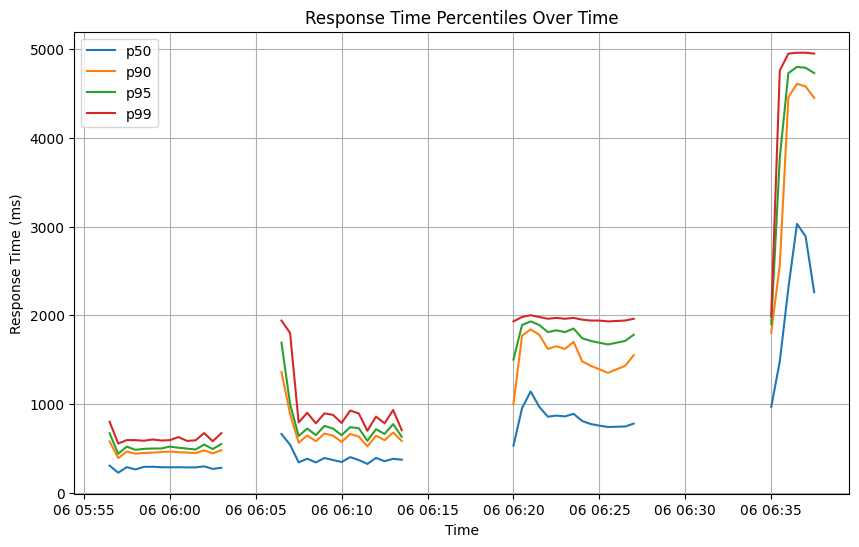

In [29]:
def convert_to_ms(value):
    if isinstance(value, str):
        if ' ms' in value:
            return float(value.replace(' ms', ''))
        elif ' s' in value:
            return float(value.replace(' s', '')) * 1000
    return float(value)

# Apply the conversion function to each column
response_time['00008 (p50)'] = response_time['00008 (p50)'].apply(convert_to_ms)
response_time['00008 (p90)'] = response_time['00008 (p90)'].apply(convert_to_ms)
response_time['00008 (p95)'] = response_time['00008 (p95)'].apply(convert_to_ms)
response_time['00008 (p99)'] = response_time['00008 (p99)'].apply(convert_to_ms)

plt.figure(figsize=(10, 6))
plt.plot(response_time['Time'], response_time['00008 (p50)'], label='p50')
plt.plot(response_time['Time'], response_time['00008 (p90)'], label='p90')
plt.plot(response_time['Time'], response_time['00008 (p95)'], label='p95')
plt.plot(response_time['Time'], response_time['00008 (p99)'], label='p99')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Response Time (ms)')
plt.title('Response Time Percentiles Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [30]:
print(merged_data.columns)
response_time.head

Index(['Time', '00008 (p50)', '00008 (p90)', '00008 (p95)', '00008 (p99)',
       '192.168.49.2:10250',
       '100 -\n(\n  avg(node_memory_MemAvailable_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""}) /\n  avg(node_memory_MemTotal_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""})\n* 100\n)\n',
       '192.168.49.2:9100 sda', '192.168.49.2:9100 Receive', 'Desired Pods',
       'Actual Pods', '192.168.49.2:9100_x', '192.168.49.2:9100_y'],
      dtype='object')


<bound method NDFrame.head of                   Time  00008 (p50)  00008 (p90)  00008 (p95)  00008 (p99)
0  2024-08-06 05:56:30        304.0        577.0        669.0        798.0
1  2024-08-06 05:57:00        224.0        388.0        437.0        553.0
2  2024-08-06 05:57:30        287.0        464.0        518.0        592.0
3  2024-08-06 05:58:00        261.0        439.0        482.0        591.0
4  2024-08-06 05:58:30        290.0        446.0        493.0        585.0
..                 ...          ...          ...          ...          ...
83 2024-08-06 06:43:30          NaN          NaN          NaN          NaN
84 2024-08-06 06:44:00          NaN          NaN          NaN          NaN
85 2024-08-06 06:44:30          NaN          NaN          NaN          NaN
86 2024-08-06 06:46:30          NaN          NaN          NaN          NaN
87 2024-08-06 06:47:00          NaN          NaN          NaN          NaN

[88 rows x 5 columns]>

In [33]:
import pandas as pd

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for df in dataframes.values():
    df['Time'] = pd.to_datetime(df['Time'])

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')



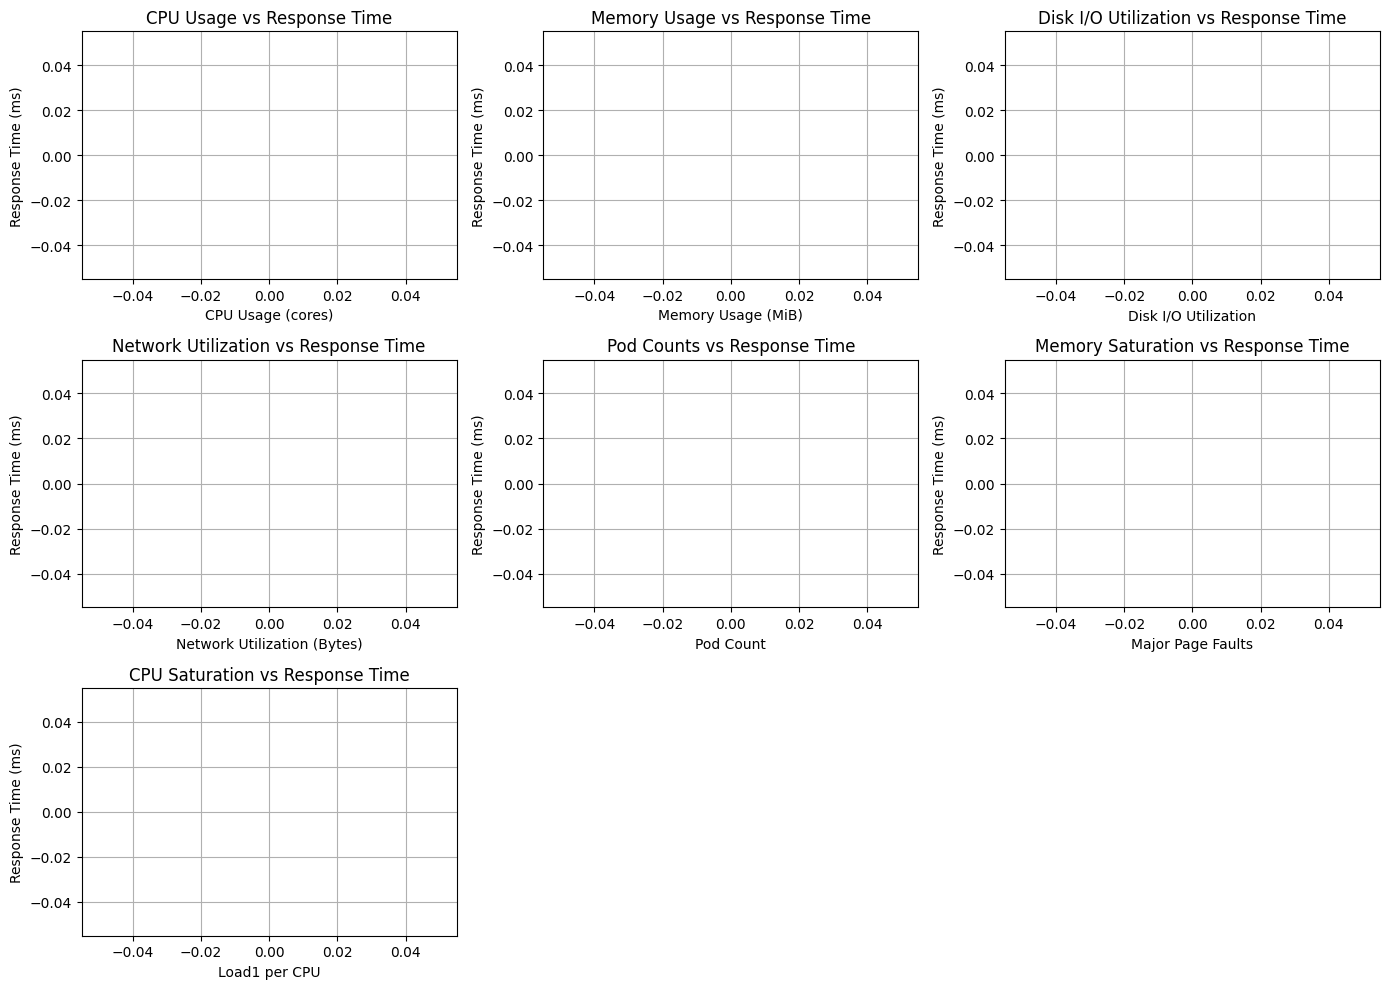

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for df in dataframes.values():
    df['Time'] = pd.to_datetime(df['Time'])

# Clean numeric columns
for name, df in dataframes.items():
    for col in df.columns:
        if col != 'Time':
            if df[col].dtype == 'object':
                df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]+', ''), errors='coerce')
            else:
                df[col] = pd.to_numeric(df[col], errors='coerce')

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')

# Drop rows with NaN values for the purpose of plotting
merged_data = merged_data.dropna()

# Create visualizations
plt.figure(figsize=(14, 10))

# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Memory Usage vs Response Time
plt.subplot(3, 3, 2)
plt.scatter(merged_data['192.168.49.2:10250_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Disk I/O Utilization vs Response Time
plt.subplot(3, 3, 3)
plt.scatter(merged_data['192.168.49.2:9100 sda'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Network Utilization vs Response Time
plt.subplot(3, 3, 4)
plt.scatter(merged_data['192.168.49.2:9100 Receive'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

# Pod Counts vs Response Time
plt.subplot(3, 3, 5)
plt.scatter(merged_data['Actual Pods'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Pod Count')
plt.ylabel('Response Time (ms)')
plt.title('Pod Counts vs Response Time')
plt.grid(True)

# Memory Saturation vs Response Time
plt.subplot(3, 3, 6)
plt.scatter(merged_data['192.168.49.2:9100_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Major Page Faults')
plt.ylabel('Response Time (ms)')
plt.title('Memory Saturation vs Response Time')
plt.grid(True)

# CPU Saturation vs Response Time
plt.subplot(3, 3, 7)
plt.scatter(merged_data['192.168.49.2:9100_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Load1 per CPU')
plt.ylabel('Response Time (ms)')
plt.title('CPU Saturation vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()


In [40]:
merged_data.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Time, 00008 (p50), 00008 (p90), 00008 (p95), 00008 (p99), 192.168.49.2:10250_x, 192.168.49.2:10250_y, 192.168.49.2:9100 sda, 192.168.49.2:9100 Receive, Desired Pods, Actual Pods, 192.168.49.2:9100_x, 192.168.49.2:9100_y]
Index: []>

In [42]:
merged_data['192.168.49.2:10250_x']

Series([], Name: 192.168.49.2:10250_x, dtype: float64)

In [43]:
merged_data.shape

(0, 13)

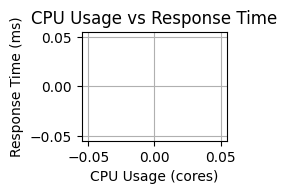

In [41]:
# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

In [45]:
import pandas as pd

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for name, df in dataframes.items():
    df['Time'] = pd.to_datetime(df['Time'])
    print(f"\n{name} dataset after parsing 'Time' column:")
    print(df.head())

# Clean numeric columns
for name, df in dataframes.items():
    for col in df.columns:
        if col != 'Time':
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^\d.]+', ''), errors='coerce')

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')

# Check the merged data
print("\nMerged DataFrame:")
print(merged_data.head())
print(merged_data.shape)



cpu_usage dataset after parsing 'Time' column:
                 Time  192.168.49.2:10250
0 2024-08-06 10:24:00              0.0305
1 2024-08-06 10:25:00              0.0552
2 2024-08-06 10:26:00              0.0577
3 2024-08-06 10:27:00              0.0591
4 2024-08-06 10:28:00              0.0609

memory_usage dataset after parsing 'Time' column:
                 Time 192.168.49.2:10250
0 2024-08-06 10:24:00            112 MiB
1 2024-08-06 10:25:00            116 MiB
2 2024-08-06 10:26:00            118 MiB
3 2024-08-06 10:27:00            121 MiB
4 2024-08-06 10:28:00            119 MiB

disk_io_utilization dataset after parsing 'Time' column:
                 Time 192.168.49.2:9100 sda
0 2024-08-06 11:02:00                 4.64%
1 2024-08-06 11:03:00                 4.65%
2 2024-08-06 11:04:00                 5.02%
3 2024-08-06 11:05:00                 5.18%
4 2024-08-06 11:06:00                 5.15%

network_utilization dataset after parsing 'Time' column:
                 Time 1


cpu_usage dataset after parsing 'Time' column:
                 Time  192.168.49.2:10250
0 2024-08-06 10:24:00              0.0305
1 2024-08-06 10:25:00              0.0552
2 2024-08-06 10:26:00              0.0577
3 2024-08-06 10:27:00              0.0591
4 2024-08-06 10:28:00              0.0609

memory_usage dataset after parsing 'Time' column:
                 Time 192.168.49.2:10250
0 2024-08-06 10:24:00            112 MiB
1 2024-08-06 10:25:00            116 MiB
2 2024-08-06 10:26:00            118 MiB
3 2024-08-06 10:27:00            121 MiB
4 2024-08-06 10:28:00            119 MiB

disk_io_utilization dataset after parsing 'Time' column:
                 Time 192.168.49.2:9100 sda
0 2024-08-06 11:02:00                 4.64%
1 2024-08-06 11:03:00                 4.65%
2 2024-08-06 11:04:00                 5.02%
3 2024-08-06 11:05:00                 5.18%
4 2024-08-06 11:06:00                 5.15%

network_utilization dataset after parsing 'Time' column:
                 Time 1

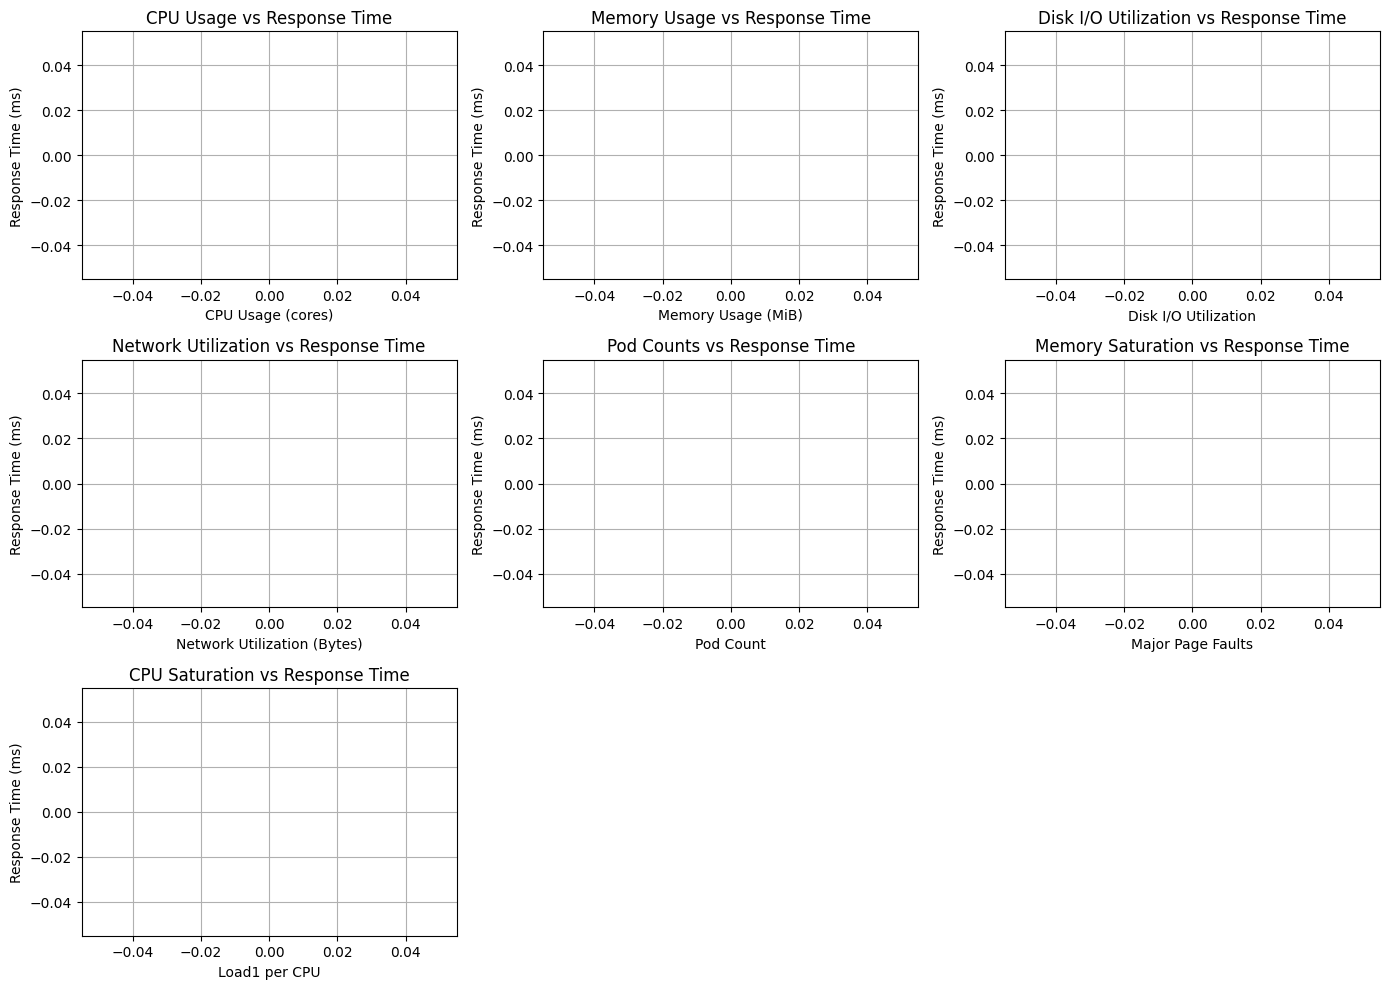

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for name, df in dataframes.items():
    df['Time'] = pd.to_datetime(df['Time'])
    print(f"\n{name} dataset after parsing 'Time' column:")
    print(df.head())

# Clean numeric columns
for name, df in dataframes.items():
    for col in df.columns:
        if col != 'Time':
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^\d.]+', ''), errors='coerce')

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')


# Create visualizations
plt.figure(figsize=(14, 10))

# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Memory Usage vs Response Time
plt.subplot(3, 3, 2)
plt.scatter(merged_data['192.168.49.2:10250_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Disk I/O Utilization vs Response Time
plt.subplot(3, 3, 3)
plt.scatter(merged_data['192.168.49.2:9100 sda'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Network Utilization vs Response Time
plt.subplot(3, 3, 4)
plt.scatter(merged_data['192.168.49.2:9100 Receive'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

# Pod Counts vs Response Time
plt.subplot(3, 3, 5)
plt.scatter(merged_data['Actual Pods'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Pod Count')
plt.ylabel('Response Time (ms)')
plt.title('Pod Counts vs Response Time')
plt.grid(True)

# Memory Saturation vs Response Time
plt.subplot(3, 3, 6)
plt.scatter(merged_data['192.168.49.2:9100_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Major Page Faults')
plt.ylabel('Response Time (ms)')
plt.title('Memory Saturation vs Response Time')
plt.grid(True)

# CPU Saturation vs Response Time
plt.subplot(3, 3, 7)
plt.scatter(merged_data['192.168.49.2:9100_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Load1 per CPU')
plt.ylabel('Response Time (ms)')
plt.title('CPU Saturation vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()


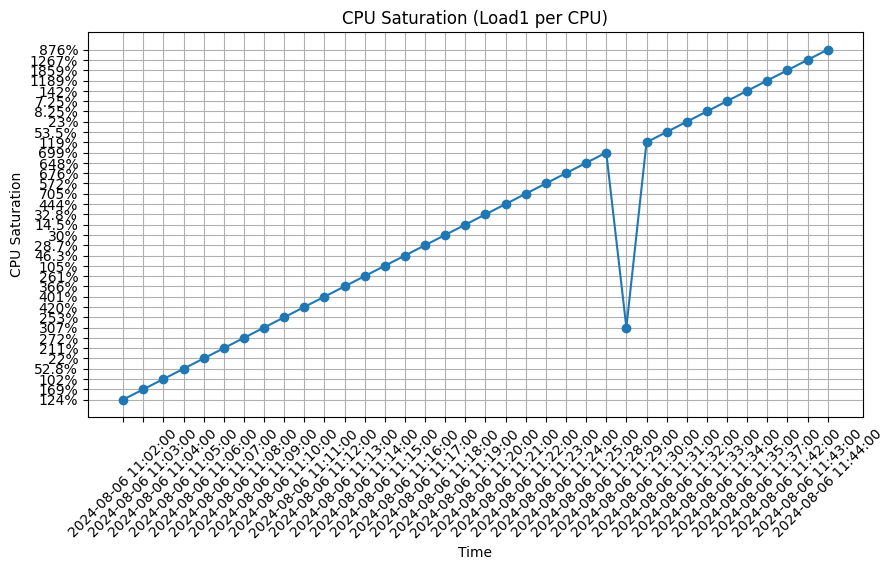

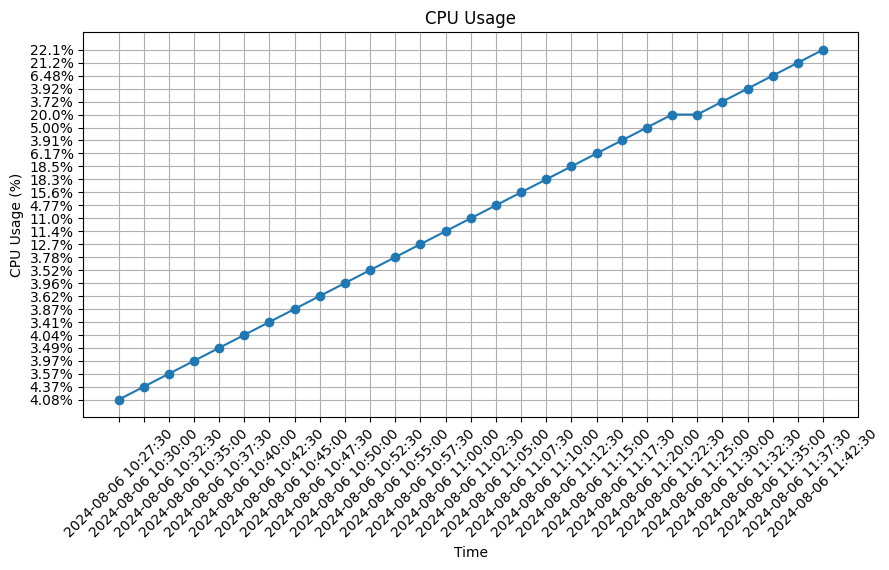

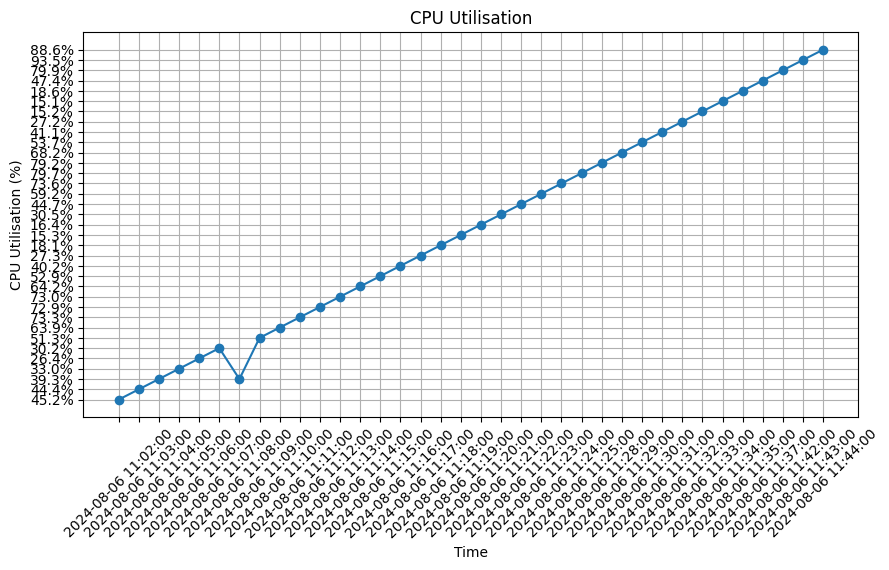

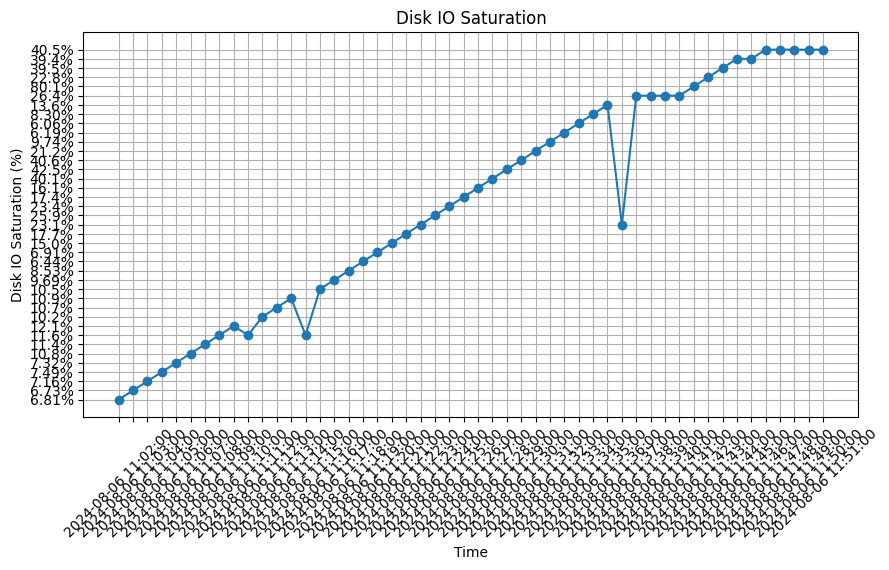

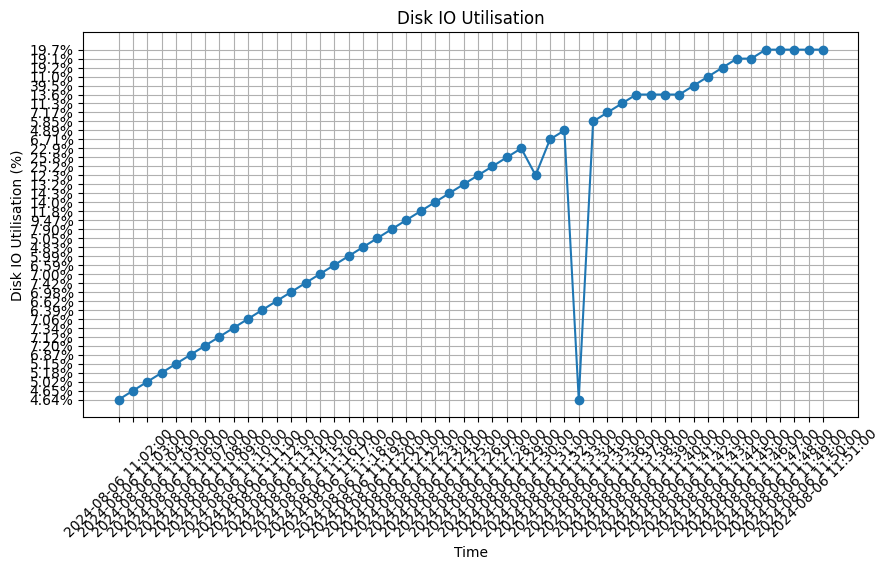

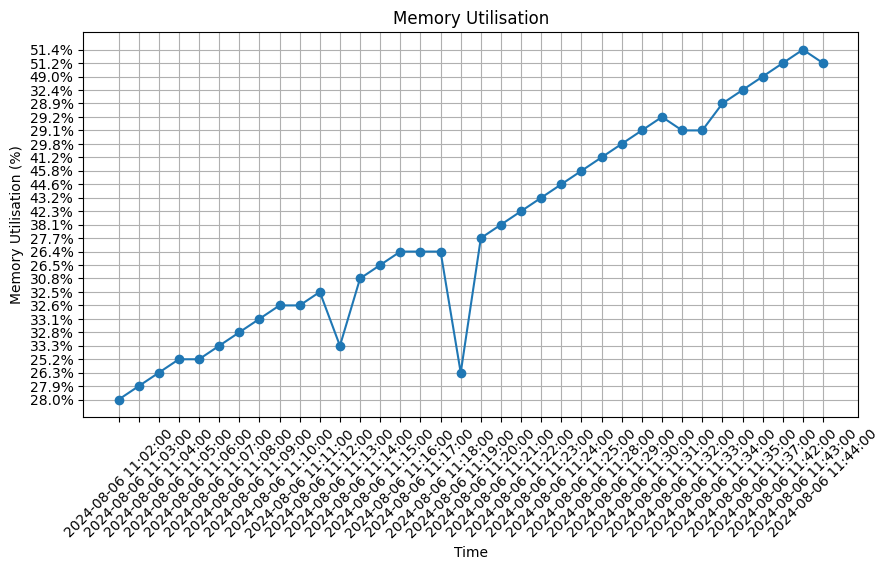

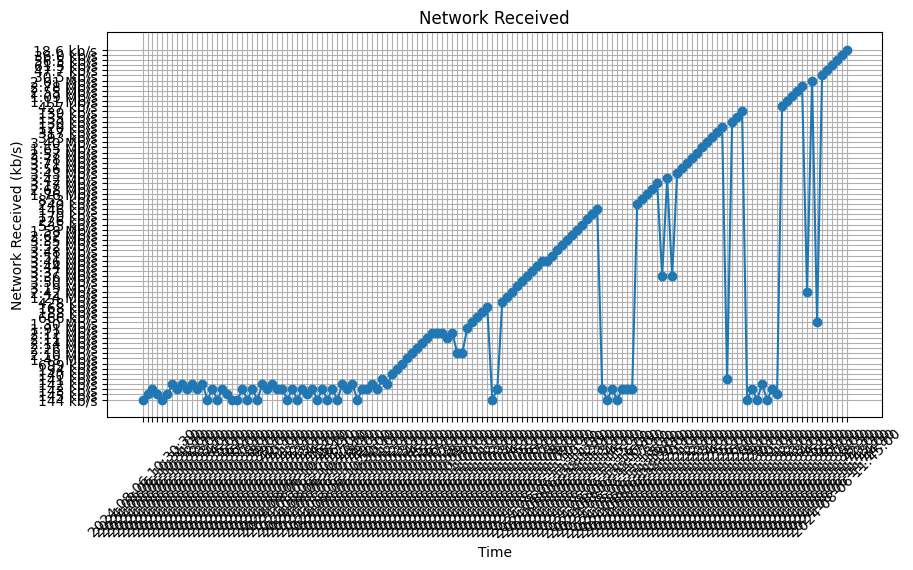

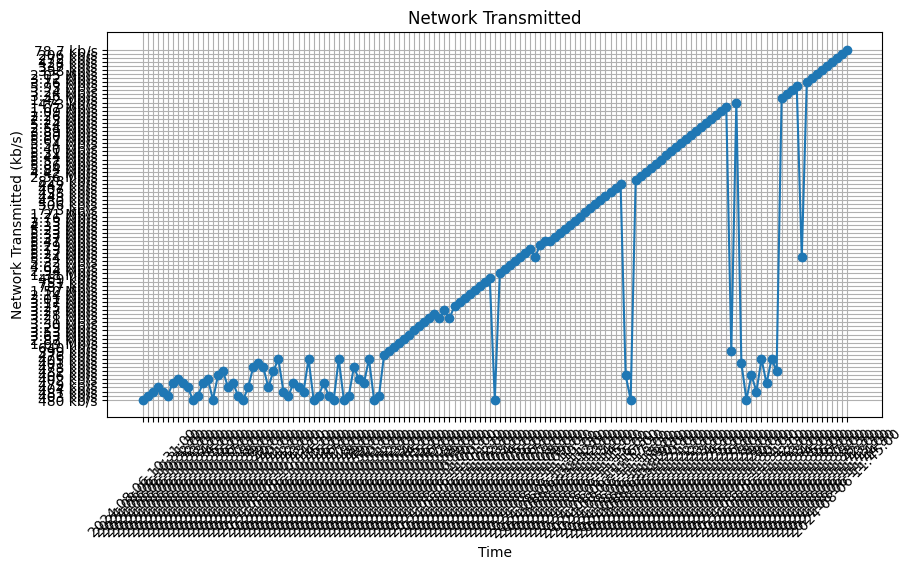

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path prefix
file_path_prefix = "fhir-fastapiapp/"

# List of CSV files with updated paths
csv_files = {
    "CPU_Saturation": f"{file_path_prefix}CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv",
    "CPU_Usage": f"{file_path_prefix}CPU Usage-data-2024-08-06 08_30_16.csv",
    "CPU_Utilisation": f"{file_path_prefix}CPU Utilisation-data-2024-08-06 08_32_27.csv",
    "Disk_IO_Saturation": f"{file_path_prefix}Disk IO Saturation-data-2024-08-06 08_33_04.csv",
    "Disk_IO_Utilisation": f"{file_path_prefix}Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "Memory_Utilisation": f"{file_path_prefix}Memory Utilisation-data-2024-08-06 08_32_38.csv",
    "Network_Received": f"{file_path_prefix}Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv",
    "Network_Transmitted": f"{file_path_prefix}Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv",
}

# Function to read CSV files into DataFrames
def read_csv_files(file_paths):
    dataframes = {}
    for key, file in file_paths.items():
        try:
            df = pd.read_csv(file)
            dataframes[key] = df
        except Exception as e:
            print(f"Error reading {file}: {e}")
    return dataframes

# Read the CSV files
dataframes = read_csv_files(csv_files)

# Plotting function
def plot_data(df, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    plt.plot(df[x_col], df[y_col], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting CPU Saturation
plot_data(dataframes["CPU_Saturation"], "Time", "192.168.49.2:9100", "CPU Saturation (Load1 per CPU)", "Time", "CPU Saturation")

# Plotting CPU Usage
plot_data(dataframes["CPU_Usage"], "Time", "0", "CPU Usage", "Time", "CPU Usage (%)")

# Plotting CPU Utilisation
plot_data(dataframes["CPU_Utilisation"], "Time", "192.168.49.2:9100", "CPU Utilisation", "Time", "CPU Utilisation (%)")

# Plotting Disk IO Saturation
plot_data(dataframes["Disk_IO_Saturation"], "Time", "192.168.49.2:9100 sda", "Disk IO Saturation", "Time", "Disk IO Saturation (%)")

# Plotting Disk IO Utilisation
plot_data(dataframes["Disk_IO_Utilisation"], "Time", "192.168.49.2:9100 sda", "Disk IO Utilisation", "Time", "Disk IO Utilisation (%)")

# Plotting Memory Utilisation
plot_data(dataframes["Memory_Utilisation"], "Time", "192.168.49.2:9100", "Memory Utilisation", "Time", "Memory Utilisation (%)")

# Plotting Network Received
plot_data(dataframes["Network_Received"], "Time", "bridge", "Network Received", "Time", "Network Received (kb/s)")

# Plotting Network Transmitted
plot_data(dataframes["Network_Transmitted"], "Time", "bridge", "Network Transmitted", "Time", "Network Transmitted (kb/s)")
